In [1]:
import pandas as pd

# Menggunakan Pandas untuk membaca file.csv
dataframe = pd.read_csv('/data/McDonald_s_Reviews.csv', encoding='latin-1')
# Menampilkan isi data
print(dataframe.head(1))


   reviewer_id  store_name              category   
0            1  McDonald's  Fast food restaurant  \

                                       store_address  latitude   longitude   
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874  \

  rating_count   review_time   
0        1,240  3 months ago  \

                                              review  rating  
0  Why does it look like someone spit on my food?...  1 star  


In [1]:
import psycopg2

conn = psycopg2.connect(
    host="postgres",
    port="5432",
    database="mydatabase",
    user="airflow",
    password="mypassword"
)

cursor = conn.cursor()

In [10]:
create_table_query = """
CREATE TABLE reviews (
    reviewer_id INTEGER,
    store_name VARCHAR(255),
    category VARCHAR(255),
    store_address VARCHAR(255),
    latitude FLOAT,
    longitude FLOAT,
    rating_count INTEGER,
    review_time VARCHAR(255),
    review TEXT,
    rating VARCHAR(10)
)
"""
cursor.execute(create_table_query)
conn.commit()


In [2]:
import pyspark
import os
import json
import argparse

from dotenv import load_dotenv
from pathlib import Path
from pyspark.sql.types import StructType
from pyspark.sql.functions import to_timestamp,col,when

In [3]:
dotenv_path = Path('/resources/.env')
load_dotenv(dotenv_path=dotenv_path)

True

In [4]:
postgres_host = os.getenv('POSTGRES_HOST')
postgres_db = os.getenv('POSTGRES_DB')
postgres_user = os.getenv('POSTGRES_USER')
postgres_password = os.getenv('POSTGRES_PASSWORD')

In [5]:
jdbc_url = f'jdbc:postgresql://{postgres_host}/{postgres_db}'
jdbc_properties = {
    'user': postgres_user,
    'password': postgres_password,
    'driver': 'org.postgresql.Driver',
    'stringtype': 'unspecified'
}

In [6]:
sparkcontext = pyspark.SparkContext.getOrCreate(conf=(
        pyspark
        .SparkConf()
        .setAppName('Dibimbing')
        .setMaster('local')
        .set("spark.jars", "/opt/postgresql-42.2.18.jar")
    ))
sparkcontext.setLogLevel("WARN")

spark = pyspark.sql.SparkSession(sparkcontext.getOrCreate())

In [7]:
retail_df = spark.read.jdbc(
    jdbc_url,
    'public.reviews',
    properties=jdbc_properties
)

In [11]:
import numpy as np
df.replace('NaT', np.nan, inplace=True)

In [20]:
import pandas as pd
import numpy as np
import psycopg2
from datetime import datetime

# Membaca file CSV
dataframe = pd.read_csv('/data/McDonald_s_Reviews.csv', encoding='latin-1')

dataframe = dataframe.drop("rating_count", axis=1)

# Replace string 'NaT' values with None
dataframe.replace('NaT', None, inplace=True)

def parse_date(date_str):
    if pd.isnull(date_str) or date_str == 'NaT':
        return None
    if 'ago' in date_str:
        num_units, unit = date_str.split(' ')[0], date_str.split(' ')[1]
        if unit == 'days':
            return datetime.now() - pd.DateOffset(days=int(num_units))
        elif unit == 'months':
            return datetime.now() - pd.DateOffset(months=int(num_units))
        elif unit == 'years':
            return datetime.now() - pd.DateOffset(years=int(num_units))
    else:
        return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

dataframe['review_time'] = dataframe['review_time'].apply(parse_date)

# Remove rows with None values in the 'review_time' column
dataframe.dropna(inplace=True)

dataframe.drop_duplicates(inplace=True)

dataframe['rating'] = dataframe['rating'].str.extract('(\d)').astype(int)

# Membuat koneksi ke database PostgreSQL
conn = psycopg2.connect(
    host="postgres",
    port=5432,  # Port PostgreSQL
    database="mydatabase",
    user="airflow",
    password="mypassword"
)

# Membuka kursor untuk eksekusi perintah SQL
cur = conn.cursor()

# Menghapus tabel jika sudah ada
cur.execute("DROP TABLE IF EXISTS reviews")

# Membuat tabel baru
cur.execute("""
    CREATE TABLE reviews (
        reviewer_id INTEGER,
        store_name VARCHAR(255),
        category VARCHAR(255),
        store_address VARCHAR(255),
        latitude FLOAT,
        longitude FLOAT,
        review_time TIMESTAMP,
        review TEXT,
        rating VARCHAR(10)
    )
""")

# Mengubah format data DataFrame menjadi tupel yang dapat dimasukkan ke dalam tabel
data = [tuple(row) for row in dataframe.values]

# Menyusun perintah SQL untuk memasukkan data ke dalam tabel
insert_query = """
    INSERT INTO reviews (
        reviewer_id,
        store_name,
        category,
        store_address,
        latitude,
        longitude,
        review_time,
        review,
        rating
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Menjalankan perintah SQL dengan data yang akan dimasukkan
cur.executemany(insert_query, data)

# Mengeksekusi dan mengcommit perubahan
conn.commit()

# Menutup koneksi dan kursor
cur.close()
conn.close()

# Menampilkan isi data
print(dataframe.head(1))


   reviewer_id  store_name              category   
0            1  McDonald's  Fast food restaurant  \

                                       store_address  latitude   longitude   
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874  \

                 review_time   
0 2023-04-09 00:18:44.228872  \

                                              review  rating  
0  Why does it look like someone spit on my food?...       1  


In [22]:
dataframe

,reviewer_id,store_name,category,store_address,latitude,longitude,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-04-09 00:18:44.228872,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-04 00:18:44.229030,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-04 00:18:44.229083,Made a mobile order got to the speaker and che...,1
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-05-09 00:18:44.229125,"I repeat my order 3 times in the drive thru, a...",1
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-04-09 00:18:44.229166,If I could give this location a zero on custo...,1
...,...,...,...,...,...,...,...,...,...
33388,33389,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2020-07-09 00:18:45.215782,All very good food attention,5
33389,33390,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2018-07-09 00:18:45.215818,Quiet open the local January 1.,4
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2019-07-09 00:18:45.215853,They treated me very badly.,1
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2018-07-09 00:18:45.215890,"It's good, but lately it has become very expen...",5


In [7]:
import psycopg2
import pandas as pd

# Membuat koneksi ke database PostgreSQL
conn = psycopg2.connect(
    host="postgres",
    port=5432,  # Port PostgreSQL
    database="mydatabase",
    user="airflow",
    password="mypassword"
)

# Membuka kursor untuk eksekusi perintah SQL
cur = conn.cursor()

# Menjalankan perintah SQL untuk mengambil data dari tabel
cur.execute("SELECT * FROM reviews")

# Mendapatkan hasil data dari perintah SQL
data = cur.fetchall()

# Membuat DataFrame dari hasil data
df = pd.DataFrame(data, columns=["reviewer_id", "store_name", "category", "store_address", "latitude", "longitude", "review_time", "review", "rating"])

# Menampilkan DataFrame menggunakan display()
display(df)

# Menutup koneksi dan kursor
cur.close()
conn.close()


,reviewer_id,store_name,category,store_address,latitude,longitude,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-04-08 23:58:37.493434,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-03 23:58:37.493675,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-03 23:58:37.493739,Made a mobile order got to the speaker and che...,1
3,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-05-08 23:58:37.493782,"I repeat my order 3 times in the drive thru, a...",1
4,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-04-08 23:58:37.493823,If I could give this location a zero on custo...,1
...,...,...,...,...,...,...,...,...,...
27118,33389,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2020-07-08 23:58:38.511141,All very good food attention,5
27119,33390,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2018-07-08 23:58:38.511175,Quiet open the local January 1.,4
27120,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2019-07-08 23:58:38.511210,They treated me very badly.,1
27121,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2018-07-08 23:58:38.511245,"It's good, but lately it has become very expen...",5


In [67]:
import psycopg2

# Membuat koneksi ke database PostgreSQL
conn = psycopg2.connect(
    host="postgres",
    port=5432,  # Port PostgreSQL
    database="mydatabase",
    user="airflow",
    password="mypassword"
)

# Membuka kursor untuk eksekusi perintah SQL
cur = conn.cursor()

# Menjalankan perintah SQL untuk menghapus tabel
cur.execute("DROP TABLE IF EXISTS reviews")

# Mengeksekusi dan mengcommit perubahan
conn.commit()

# Menutup koneksi dan kursor
cur.close()
conn.close()

print("Tabel 'reviews' berhasil dihapus.")

Tabel 'reviews' berhasil dihapus.


In [21]:
# Pengecekan missing value
missing_values = dataframe.isna().sum()

# Menampilkan jumlah missing value per kolom
print(missing_values)


reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
review_time      0
review           0
rating           0
dtype: int64


In [39]:
df.dropna(inplace=True)

In [44]:
df = df.drop_duplicates()

In [45]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,5 years ago,"It's good, but lately it has become very expen...",5 stars


In [46]:
df['rating'] = df['rating'].str.extract('(\d)').astype(int)

In [53]:
import dateparser

df['review_time'] = df['review_time'].apply(lambda x: dateparser.parse(x))


In [52]:
!pip install dateparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 kB 4.0 MB/s eta 0:00:0000:0100:01


In [54]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-04-08 22:45:25.832684,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-03 22:45:25.835074,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-07-03 22:45:25.835936,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-06-08 22:45:25.837104,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,2023-05-08 22:45:25.838191,"I repeat my order 3 times in the drive thru, a...",1
...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2019-07-08 22:45:48.704526,They treated me very badly.,1
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2022-07-08 22:45:48.705162,The service is very good,5
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2022-07-08 22:45:48.705894,To remove hunger is enough,4
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,2018-07-08 22:45:48.706586,"It's good, but lately it has become very expen...",5


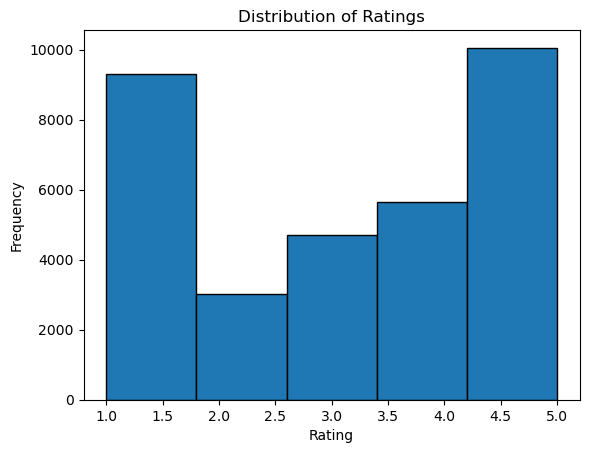

In [55]:
import matplotlib.pyplot as plt

# Membuat histogram dari kolom "rating"
plt.hist(df['rating'], bins=5, edgecolor='black')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Menampilkan plot histogram
plt.show()


In [56]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame
print(df.dtypes)


reviewer_id               int64
store_name               object
category                 object
store_address            object
latitude                float64
longitude               float64
review_time      datetime64[ns]
review                   object
rating                    int64
dtype: object
